자동차연비 에측분석 ==> 회귀분석

In [3]:
import pandas as pd

In [4]:
#auto-mpg.csv 읽기
data_df=pd.read_csv('auto-mpg.csv')

In [7]:
#데이터 셋 크기
data_df.shape

(398, 9)

In [8]:
# 상위 5개 
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
data_df.info

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1        

In [16]:
# 'car_name', 'origin', 'horsepower' 제거
data_df = data_df.drop(['car_name', 'origin', 'horsepower'],axis=1)
data_df.shape

(398, 6)

In [17]:
# 훈련용 데이터 : X  훈련용 데이터 label : Y ('mpg') 로 분리
X = data_df.drop('mpg',axis=1)
Y = data_df['mpg']
print(X)
print(Y)

     cylinders  displacement  weight  acceleration  model_year
0            8         307.0    3504          12.0          70
1            8         350.0    3693          11.5          70
2            8         318.0    3436          11.0          70
3            8         304.0    3433          12.0          70
4            8         302.0    3449          10.5          70
..         ...           ...     ...           ...         ...
393          4         140.0    2790          15.6          82
394          4          97.0    2130          24.6          82
395          4         135.0    2295          11.6          82
396          4         120.0    2625          18.6          82
397          4         119.0    2720          19.4          82

[398 rows x 5 columns]
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# 훈련용데이터와 평가용 데이터 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.3)
X_train

,cylinders,displacement,weight,acceleration,model_year
230,8,350.0,4165,11.4,77
357,4,119.0,2615,14.8,81
140,8,304.0,4257,15.5,74
22,4,104.0,2375,17.5,70
250,8,318.0,3735,13.2,78
...,...,...,...,...,...
323,4,156.0,2800,14.4,80
192,6,250.0,3353,14.5,76
117,4,68.0,1867,19.5,73
47,6,250.0,3282,15.0,71


In [21]:
# 선형회귀분석
lr = LinearRegression()
# 훈련
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_Predict 구하기
Y_predict = lr.predict(X_test)
Y_predict

array([12.68813886, 24.89235692, 11.77966226, 20.713484  , 17.59974974,
       28.70463932, 31.8246109 , 24.79459783, 13.3797074 , 28.03809202,
       33.95480562, 32.517138  , 21.28643713, 26.32547953, 16.29305741,
       32.16905355, 30.04731897, 29.90617451, 17.78110613, 30.69577551,
       15.33574367, 25.60299563, 25.4723533 , 20.04730443, 30.70244174,
       26.79576507, 32.20306918, 31.95533215, 30.42830733, 18.19432511,
       21.19981862, 29.62938625, 20.86352443, 30.82503708, 24.35511863,
       23.81034331, 21.45816755, 16.77101118, 31.95362794,  8.06590693,
        9.60178767, 13.8699291 , 27.26165312, 29.00102026, 29.52364892,
       22.58571769, 23.20233694, 13.80533693, 23.86039376, 28.12535283,
       31.40954528, 26.70297991, 15.34381889, 25.01897062, 14.71481708,
        9.53883961, 19.64272577, 26.82491432, 31.30917854, 14.99268593,
       20.64360774, 25.57610711, 22.45200894, 19.72033566, 10.7918702 ,
       11.42513414,  9.7023088 , 19.68724093, 24.98227534,  9.68

In [24]:
# 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

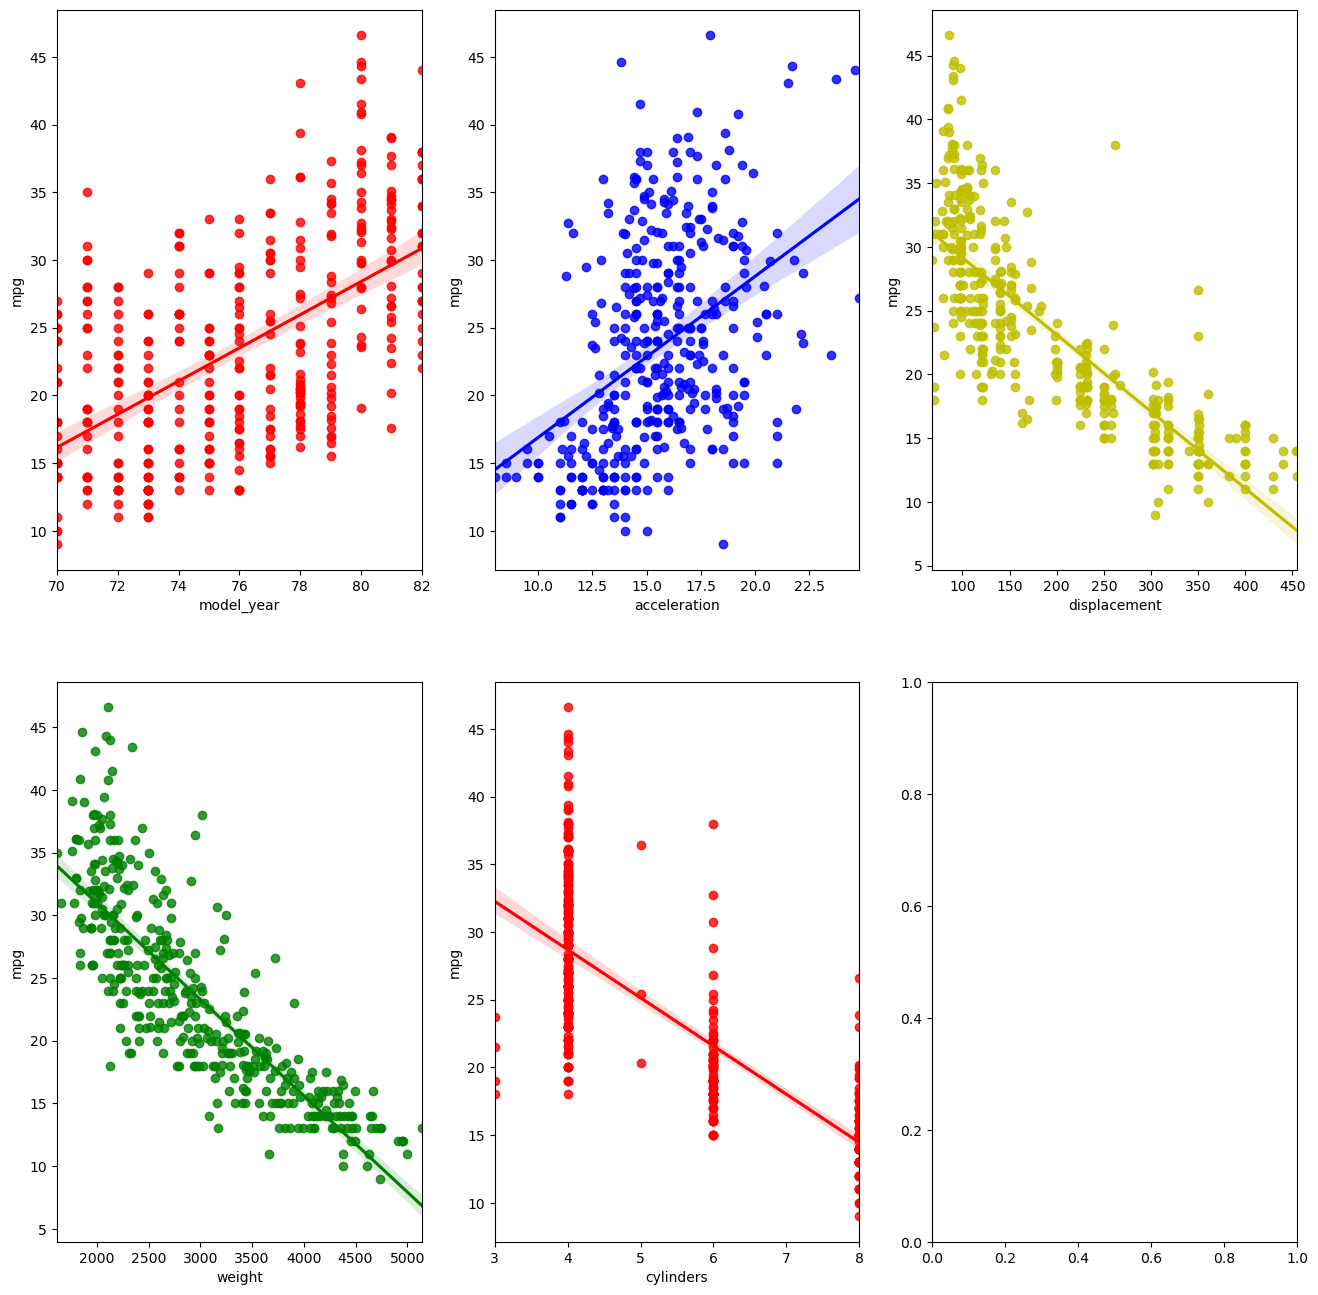

In [26]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)
x_features = ['model_year','acceleration','displacement','weight','cylinders',]

plot_color = ['r','b','y','g','r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=data_df, ax = axs[row][col], color=plot_color[i])
    

In [34]:
# 실제값과 예측값의 차이를 제곱으로 평균
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,Y_predict)
mse

12.278239036609508

In [35]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.5040318258556824

In [36]:
print('MSE : ', round(mse,3), 'RMSE : ', round(rmse,3))

MSE :  12.278 RMSE :  3.504


In [38]:
# r2 는 0과 1사이 존재
# r2 = 1 : 현재 X 로 Y 를 100% 설명, 즉 모든 관측치가 회귀 직선 위에 있다.
# r2 = 0 : 현재 X 로 Y 를 100% 설명(예측)에 전혀 도움이 되지 않음.
r2 = r2_score(y_test, Y_predict)
r2

0.8078579451877164

In [40]:
print('R^2(Variance score):{0:.3f}'.format(r2_score(y_test,Y_predict)))

R^2(Variance score):0.808


In [42]:
print('Y절편 값 : ' , np.round(lr.intercept_,2))
print('회귀계수 값 : ' , np.round(lr.coef_,2))

Y절편 값 :  -17.55
회귀계수 값 :  [-0.14  0.01 -0.01  0.2   0.76]


y = -0.14x1 + 0.01x2 - 0.01x3+ 0.2x4 + 0.76x5 -17.55

In [45]:
coef = pd.Series(data= np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [50]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
cylinders_1=int(input("cylinders : ")) #8
model_year_1=int(input("model_year : ")) #99
displacement_1=int(input("displacement : ")) #350
weight_1=int(input("weight : ")) #3200
acceleration_1=int(input("acceleration : ")) #22
print(cylinders_1,model_year_1,displacement_1,weight_1,acceleration_1)

연비를 예측하고 싶은 차의 정보를 입력해주세요.
8 99 350 3200 22


In [51]:
mpg_predict = lr.predict([[cylinders_1,displacement_1,weight_1,acceleration_1,model_year_1]])
mpg_predict

c:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41.31991868])

In [52]:
print('이 자동차 연비(mpg) : %.2f 입니다.' %mpg_predict)

이 자동차 연비(mpg) : 41.32 입니다.
